# <center> Solving inverse problems in imaging with Shearlab.jl <center>
### <center> Héctor Andrade Loarca (TUB) </center>
<img src="./SIAM.png" alt="Mountain View" style="width:200px;">


## <center> What is julia? </center>

<img src="./julia.svg" alt="Mountain View" style="width:200px;">

- **Modern programming** language for numerical computing (Jeff Beznason, Stefan Karpinsky, Alan Edelman, Viral Shah; MIT, 2013). 

<br>

- High-level, high-performance, dynamic. Julia is written mostly in julia.

<br>

- Main features:
<br><br>
    - **Multiple dispatch**: Functions definition across many types
    <br><br>
    - **Dynamic type system**: Create your own types
    <br><br>
    - **JIT compilation**: Precompiles every code you run
    <br><br>
    - **External calls**: You can call C and python within julia
    <br><br>
    - **Easy to paralellize**: By gpu or cpu
    <br><br>
    - **MIT licensed**: free and open source, very easy to publish your code (library system in github)
    <br><br>
    - **Good performance**: Close to C, loops very fast
    

<img src="./benchmarks.png" alt="Mountain View" style="width:800px;">

## <center> Why Julia for Shearlets? </center>

- Extensive use of `fft`, well implemented in Julia.

<br>

- Fast vectorization and loops as well as JIT-compilation.

<br>

- Plenty of image filtering, import and rescaling functions with  `Images.jl`, `Wavelets.jl`.

<br>

- Support of multithreading and painless GPU processing with `ArrayFire.jl`.

## <center> Lets do Shearlets! </center>

### <center> Install the library </center>

In [ ]:
Pkg.add("Shearlab") #Julia 0.6 and 0.5, only 0.5 has gpu support

In [ ]:
# Don't
Pkg.checkout("Shearlab")

### <center> Import libraries and data </center>

In [1]:
using Shearlab
using PyPlot

In [2]:
# Read Data
n = 512;
# The path of the image
name = "boat.png";
data = Shearlab.load_image(name, n);

INFO: Recompiling stale cache file /Users/hector/.julia/lib/v0.6/QuartzImageIO.ji for module QuartzImageIO.


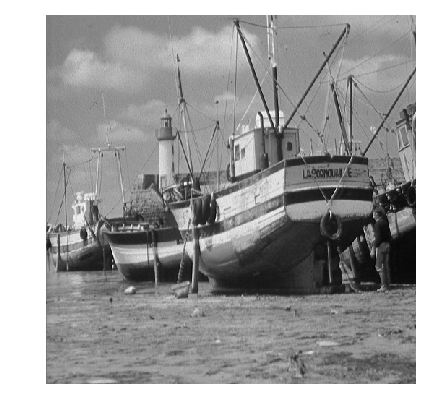

In [3]:
# Reduce one dimension 
data = data[:,:,1];
Shearlab.imageplot(data);

In [4]:
# Size of the images
sizeX = size(data,1);
sizeY = size(data,2);

In [5]:
# Set the variables for the Shearlet trasform
rows = sizeX;
cols = sizeY;
X = data; 

In [6]:
# No. of scales
nScales = 4;
shearLevels = ceil.((1:nScales)/2)
scalingFilter = Shearlab.filt_gen("scaling_shearlet");
directionalFilter = Shearlab.filt_gen("directional_shearlet");
waveletFilter = Shearlab.mirror(scalingFilter);
scalingFilter2 = scalingFilter;
full = 0;

<center> <h2> Generation of Shearlet System </h2> </center>

In [7]:
# Compute the corresponding shearlet system without gpu
@time shearletSystem =  Shearlab.getshearletsystem2D(rows,cols,4, shearLevels,full,
                                directionalFilter,
                                scalingFilter,0);

 19.244550 seconds (6.55 M allocations: 5.240 GiB, 21.39% gc time)


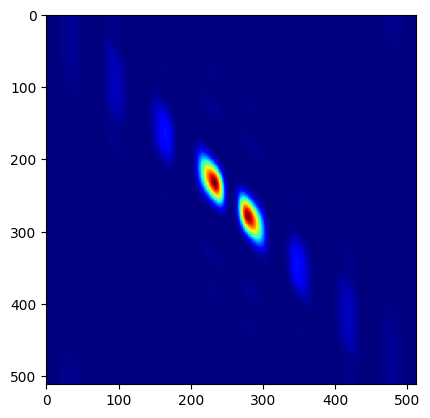

In [8]:
shearlet1 = Array(shearletSystem.shearlets[:,:,1]);
imshow(real(shearlet1), cmap="jet");

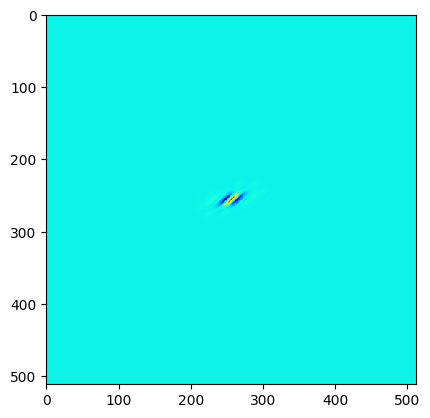

In [48]:
shearlet1 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,1]))));
imshow(real(shearlet1), cmap="jet");

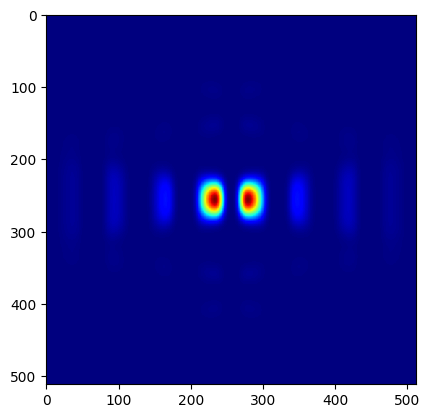

In [9]:
shearlet3 = Array(shearletSystem.shearlets[:,:,3]);
imshow(real(shearlet3), cmap="jet");

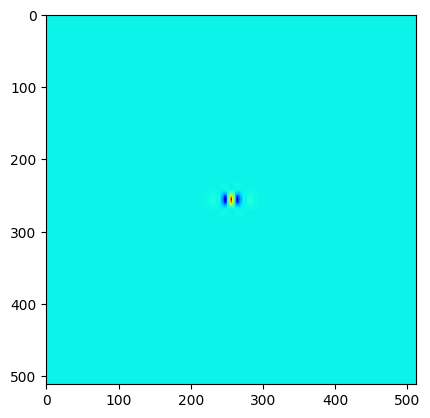

In [49]:
shearlet3 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,3]))));
imshow(real(shearlet3), cmap="jet");

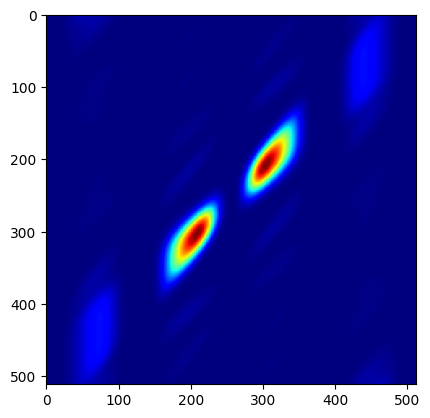

In [10]:
shearlet10 = Array(shearletSystem.shearlets[:,:,10]);
imshow(real(shearlet10), cmap="jet");

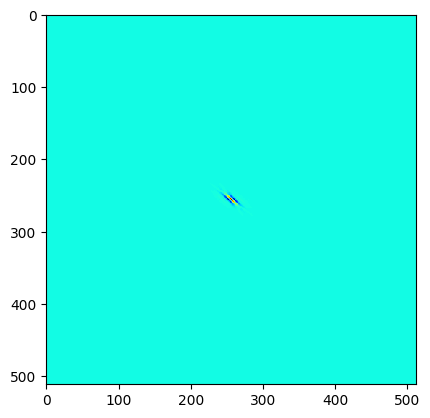

In [50]:
shearlet10 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,10]))));
imshow(real(shearlet10), cmap="jet");

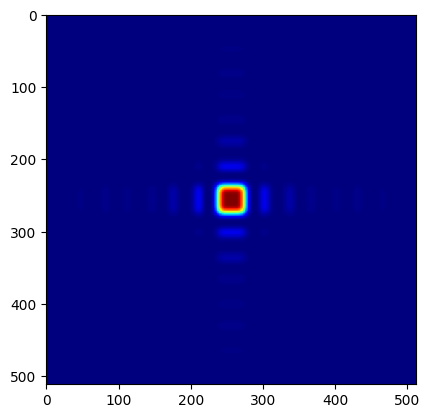

In [11]:
shearlet49 = Array(shearletSystem.shearlets[:,:,49]);
imshow(real(shearlet49), cmap="jet");

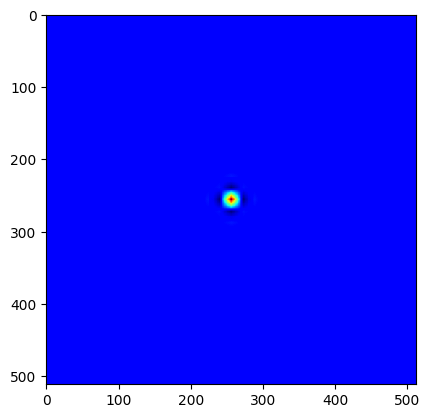

In [51]:
shearlet49 = Array(fftshift(ifft(ifftshift(shearletSystem.shearlets[:,:,49]))));
imshow(real(shearlet49), cmap="jet");

<center> <h2> Computation of shearlet coefficients </h2> </center>

In [12]:
# Compute the coefficients
@time coeffs = Shearlab.SLsheardec2D(X,shearletSystem);

  1.509548 seconds (90.14 k allocations: 1.358 GiB, 22.90% gc time)


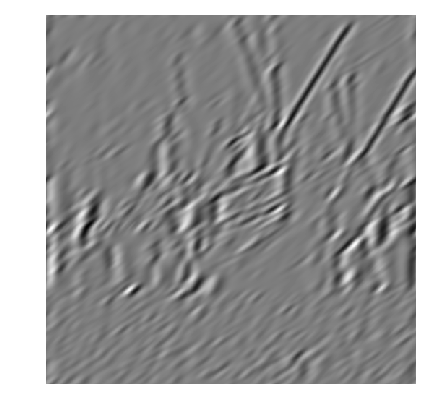

In [13]:
Shearlab.imageplot(real(Array(coeffs[:,:,1])))

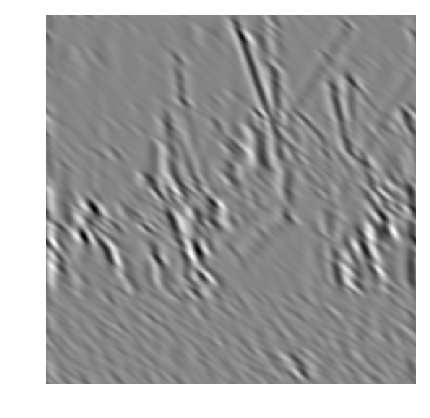

In [14]:
Shearlab.imageplot(real(Array(coeffs[:,:,5])))

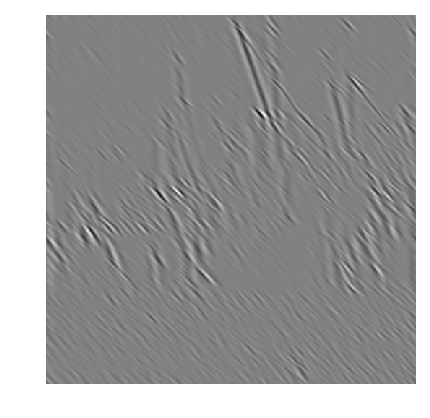

In [15]:
Shearlab.imageplot(real(Array(coeffs[:,:,10])))

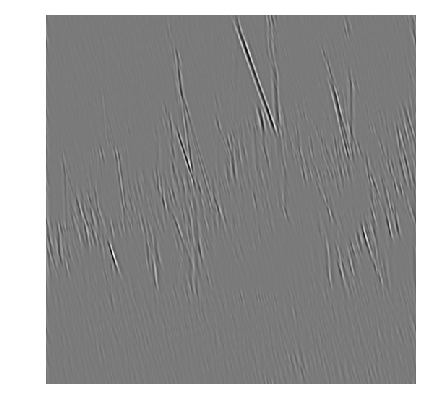

In [16]:
Shearlab.imageplot(real(Array(coeffs[:,:,16])))

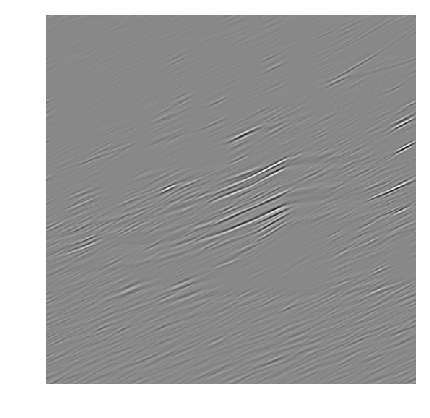

In [17]:
Shearlab.imageplot(real(Array(coeffs[:,:,40])))

<center> <h2> Reconstruction of the image with the shearlet system and coefficients </h2> </center>

In [18]:
# Make the recovery
@time Xrec=Shearlab.SLshearrec2D(coeffs,shearletSystem);

  1.352565 seconds (132.65 k allocations: 1.367 GiB, 18.02% gc time)


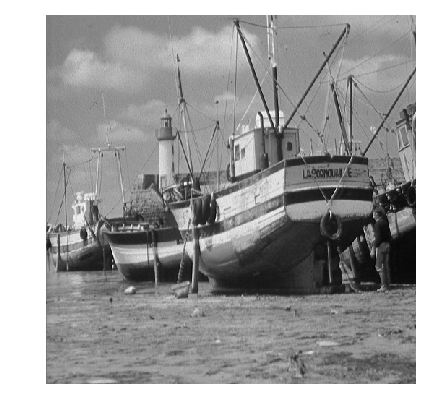

In [19]:
# The recovery is very good
Shearlab.imageplot(Array(Xrec));

<center> <h3> Benchmarks with matlab version </h3> </center>

- **2D version.**

| Benchmark     |    Matlab(seconds)     |    Julia no gpu(seconds)     |  Julia gpu (seconds)  | Improvement rate no gpu | Improvement rate gpu |
|:-------------:|:-------------:|:------------:|:----------------:|:------------------------:|:-----------------------:|
| Shearlet System 256x256| 1.06 | 0.61 | 0.31 | 1.73 |3.42 |
| Decoding 256x256 | 0.18 | 0.15 | 0.043 | 1.2 |4.19 |
| Reconstruction 256x256 | 0.18 | 0.12 | 0.018  | 1.5 |8.57 |
| Shearlet System 512x512 | 5.15 | 3.07 | 1.8 | 1.22 |2.08 |
| Decoding 512x512 | 0.96 | 0.87 | 0.09 | 1.10 |10.66 |
| Reconstruction 512x512 | 0.84 | 0.52 | 0.021 | 1.62 |14.00 |
| Shearlet System 1024x1024 | 35.84 | 15.65 | 2.44 | 2.29 |14.68|
| Decoding 1024x1024 | 4.70 | 4.67 | 0.40 | 1.01 | 8.54|
| Reconstruction 1024x1024 | 4.72 | 4.48 | 0.037 | 1.05 |127.56 |
| Shearlet System 2048x2048 | 196.69 | 68.43 | 5.4 | 2.87 | 36.42 |
| Decoding 2048x2048 | 108.19 | 32.50 | 5.88 | 3.33 | 18.39|
| Reconstruction 2048x2048 | 73.20 | 23.08 |4.23 | 97.6 | 23.09|


The benchmarks were made with 4 scales, in a Macbook pro with OSX 10.10.5, with 8GB memory, 2.7GHz Intel Core i5 processor and Graphic Card Intel Iris Graphics 6100 1536 MB.

- **Benchmarks plots 2D**.

<center><img src="Shearlet_system_benchmark.png" alt="system" style="width: 600px;"/><center/>

<center><img src="Shearlet_decoding_benchmark.png" alt="decoding" style="width: 600px;"/><center/>

<center><img src="Shearlet_reconstruction_benchmark.png" alt="reconstruction" style="width: 600px;"/><center/>


<center> <h2> Image Denoising </h2> </center>

Let $f\in \ell^2(\mathbb{Z}^2)$ and 
   $$f_{\text{noisy}}(i,j)=f(i,j)+e(i,j)$$
with noise $e(i,j)\sim \mathcal{N}(0,\sigma^2)$.  
Then
$$
f_{\text{denoised}}=S^*T_{\delta}S (f_{\text{noisy}})
$$
where $S$ is sparsifying transform (analysis operator of the shearlet system) and $T_{\delta}$ is the hard thersholding operator
$$
(T_{\delta}x)(n)=
\begin{cases}
x(n)\text{  if  }|x(n)|\geq\delta\\
0\text{  else.}
\end{cases}
$$

In [20]:
# Read Data
n = 512;
# The path of the image
name = "flowers.png";
data = Shearlab.load_image(name, n);

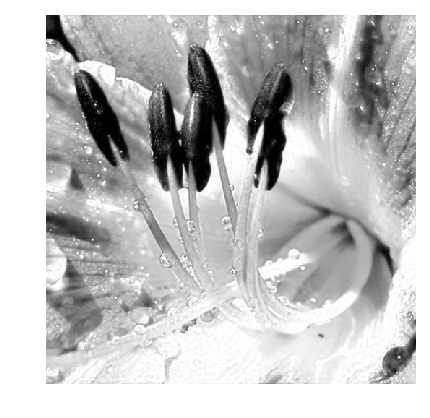

In [21]:
# Reduce one dimension 
data = data[:,:,1]*214;
Shearlab.imageplot(data);

In [22]:
# settings
sigma = 30;
scales = 4;
thresholdingFactor = 3;

In [23]:
# Give noise to data
X = data;
Xnoisy = X + sigma*randn(size(X));

In [24]:
# Decomposition
@time coeffs= Shearlab.sheardec2D( Xnoisy, shearletSystem);

  1.202184 seconds (7.06 k allocations: 1.354 GiB, 25.48% gc time)


In [25]:
# Thresholding
@time coeffs= coeffs.*(abs.(coeffs).> thresholdingFactor*reshape(repmat(shearletSystem.RMS',size(X,1)*size(X,2), 1),
        size(X,1),size(X,2),length(shearletSystem.RMS))*sigma);

  1.097331 seconds (692.40 k allocations: 513.495 MiB, 5.27% gc time)


In [26]:
# Reconstruction
Xrec = Shearlab.shearrec2D(coeffs, shearletSystem);

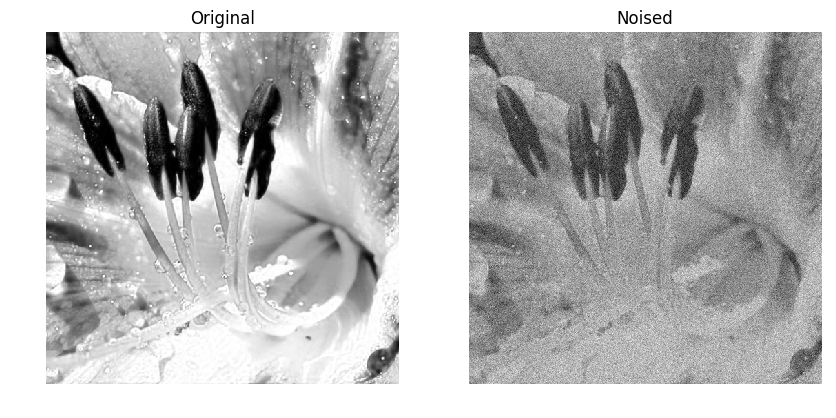

In [27]:
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(Array(X), "Original", 1,2,1); 
Shearlab.imageplot(Array(Xnoisy), "Noised", 1,2,2); 

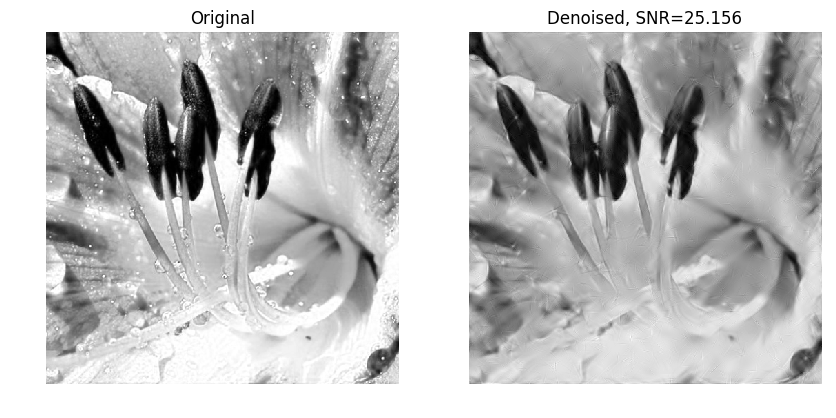

In [28]:
elin = Shearlab.snr(Array(X),Array(Xrec));
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(Array(X), "Original", 1,2,1); 
u = @sprintf("Denoised, SNR=%.3f", elin);
Shearlab.imageplot(real(Array(Xrec)), u, 1,2,2); 

## <center> Comparison with other denoising algorithms </center>



| Algorithm   | Progamming Language| Noisy PSNR | Denoised PSNR    |    Running time     |
|:-------------:|:-------------:|:-------------:|:------------:|:------------:|
| Shearlet Hard Thresholding (4 scales)| julia| 14.00 | 25.18 | 2.80 s |
| Shearlet Hard Thresholding (4 scales)| matlab | 14.00 | 25.10 | 4.50 s |
| Wavelet Hard Thresholding (8 scales) | julia | 14.00 | 16.92| 2.00 s |
| SURE (Stein Unbiased Risk Estimator) | python | 14.00 | 19.08| 2.00 s |
| Median Filter | matlab | 14.00 | 15.02 | 3.00 s |
| TSAMFT | matlab | 14.00 | 22.367| 15.00 s |
| BM3D | matlab | 14.00 | 27.00 | 2.00 s (GPU) |

The benchmarks were made in a Macbook pro with OSX 10.10.5, with 8GB memory, 2.7GHz Intel Core i5 processor and Graphic Card Intel Iris Graphics 6100 1536 MB. The fist four algorithms where implemented by the author. The last two were implemented by the group of Prof. K. Chandrasekar from KSIT Bangalore.

<center> <h2> Image inpainting </h2> </center>


- Inpainting = optimization problem.

Let $x\in\ell^2(\mathbb{Z}^2)$ be a grayscale image partially occluded by a binary mask $\mathbf{M}\in\{0,1\}^{\mathbb{Z}\times\mathbb{Z}}$, i.e.
$$
y =\mathbf{M}x
$$
One can recover $x$ (inpaint) using an sparsifying transformation with the inverse problem
$$
y^*=\min_{x\in \mathbb{R}^{N\times N}} ||S(x)||_1 \text{  s.t. } y=\mathbf{M}x
$$
By iterative thresholding algorithm
$$
x_{n+1} = S^*(T_{\lambda_n}(S(x_n+\alpha_n(y-\mathbf{M}x_n))))
$$

$\lambda_n$ decreases with the iteration number lineraly in $[\lambda_{min},\lambda_{max}]$. 

In [319]:
# Read Data
n = 512;
# The path of the image
name = "flowers.png";
data = Shearlab.load_image(name, n);

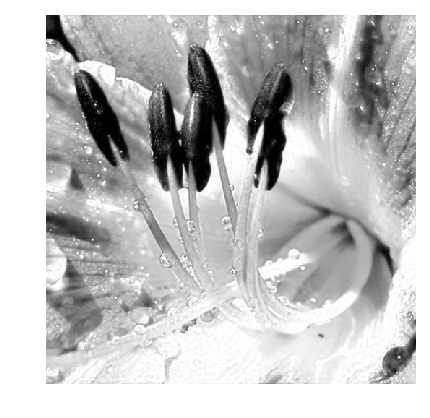

In [320]:
# Reduce one dimension 
data = data[:,:,1]*214;
Shearlab.imageplot(data);

In [322]:
function inpaint2D(imgMasked,mask,iterations,stopFactor,shearletsystem)
    coeffs = Shearlab.sheardec2D(imgMasked,shearletsystem);
    coeffsNormalized = zeros(size(coeffs))+im*zeros(size(coeffs));
    for i in 1:shearletsystem.nShearlets
        coeffsNormalized[:,:,i] = coeffs[:,:,i]./shearletsystem.RMS[i];
    end
    delta = maximum(abs.(coeffsNormalized[:]));
    lambda=(stopFactor)^(1/(iterations-1));
    imgInpainted = zeros(size(imgMasked));
    #iterative thresholding
    for it = 1:iterations
        res = mask.*(imgMasked-imgInpainted);
        coeffs = Shearlab.sheardec2D(imgInpainted+res,shearletsystem);
        coeffsNormalized = zeros(size(coeffs))+im*zeros(size(coeffs));
        for i in 1:shearletsystem.nShearlets
            coeffsNormalized[:,:,i] = coeffs[:,:,i]./shearletsystem.RMS[i];
        end
        coeffs = coeffs.*(abs.(coeffsNormalized).>delta);
        imgInpainted = Shearlab.shearrec2D(coeffs,shearletsystem);  
        delta=delta*lambda;  
    end
    imgInpainted
end

inpaint2D (generic function with 1 method)

In [323]:
# Rename images
img = data;

In [324]:
# Import two masks
name = "mask_rand.png";
mask_rand = Shearlab.load_image(name, n);
mask_rand = mask_rand[:,:,1];
name = "mask_squares.png";
mask_squares = Shearlab.load_image(name, n);
mask_squares = mask_squares[:,:,1];

In [326]:
# Setting of data 
imgMasked_rand = img.*mask_rand;
imgMasked_squares = img.*mask_squares;
stopFactor = 0.005; # The highest coefficient times stopFactor
sizeX = size(imgMasked_rand,1);
sizeY = size(imgMasked_rand,2);
nScales = 4;
shearLevels = [1, 1, 2, 2];

In [330]:
tic()
imginpainted_rand50 = inpaint2D(imgMasked_rand,mask_rand,50,stopFactor,shearletSystem);
toc()

elapsed time: 199.596496659 seconds


199.596496659

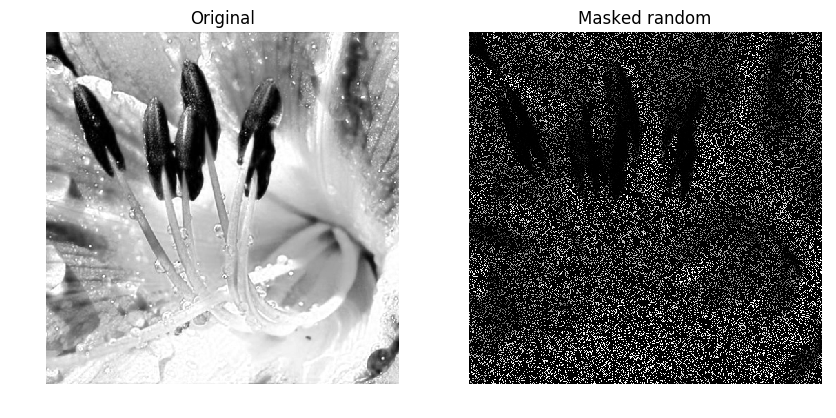

In [331]:
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
Shearlab.imageplot(imgMasked_rand, "Masked random", 1,2,2); 

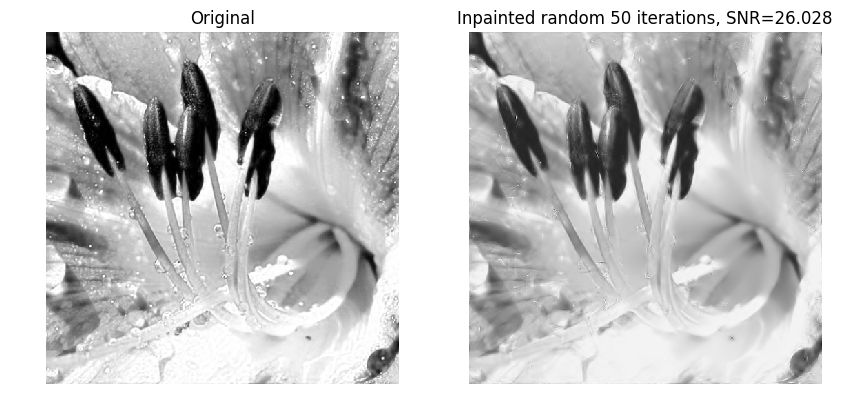

In [348]:
elin = Shearlab.snr(img,imginpainted_rand50);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted random 50 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_rand50), u, 1,2,2);

In [333]:
tic()
imginpainted_squares50 = inpaint2D(imgMasked_squares,mask_squares,50,stopFactor,shearletSystem);
toc()

elapsed time: 183.04792016 seconds


183.04792016

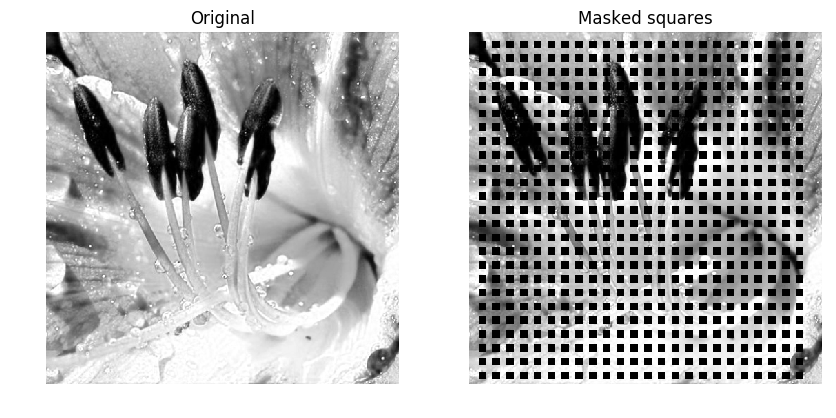

In [334]:
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
Shearlab.imageplot(imgMasked_squares, "Masked squares", 1,2,2); 

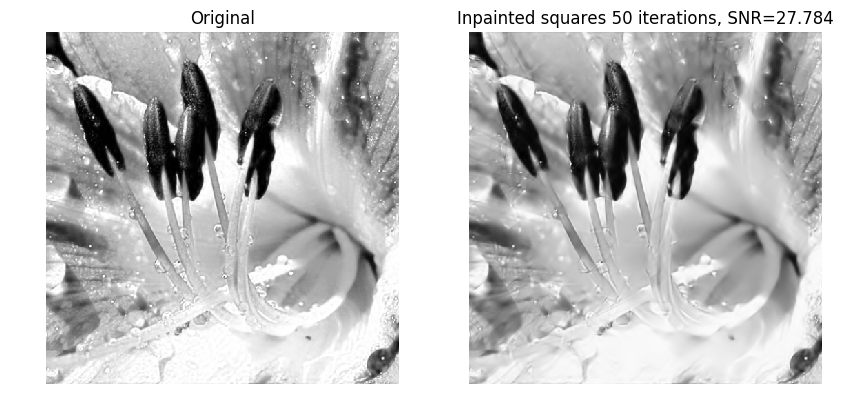

In [346]:
elin = Shearlab.snr(img,imginpainted_squares50);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(img, "Original", 1,2,1); 
u = @sprintf("Inpainted squares 50 iterations, SNR=%.3f", elin);
Shearlab.imageplot(real(imginpainted_squares50), u, 1,2,2);

## <center> Comparison with other denoising algorithms </center>



| Algorithm   | Progamming Language| Lost % | Inpainted PSNR    |    Running time     |
|:-------------:|:-------------:|:-------------:|:------------:|:------------:|
| Shearlet Iterative Hard Thresholding (4 scales)| julia| 50 % | 27.8 | 183 s |
| Shearlet Iterative Hard Thresholding (4 scales)| matlab | 50 % | 26.7 | 300 s |
| Wavelet Iterative Hard Thresholding (8 scales) | julia | 50 % | 18.92| 150 s |
| K - SVD | python | 50 % | 26.21| 200 s |
| C-SALSA | python | 50 % | 23.89 | 220 s |
| IPPO | matlab | 50 % | 30.68| 300.00 s |

## <center> Miscellaneous </center>

### APIs in other software:

- Wrapper in python (faster than pure python implementation).
<br><br>
- Shearlab API in ODL.

### Further applications:

- Learned primal dual tomographic reconstruction on shearlet coefficients (Adler, Öktem).
<br><br>
- 3D Light Field reconstruction (Andrade).

### Notebooks and Beamer:

- https://github.com/arsenal9971/Shearlab.jl/tree/master/presentations/SIAM_IS

## <center> Conclusions </center>

- ### One can denoise and inpaint images using sparse $\ell_1$-regularization within an specific frame.
- ### Shearlets are an optimal frame to do this.
- ### Julia is an optimal language to implement Shearlets.
- ### Julia is great.

# <center> Thanks! </center>

# <center> Questions? </center>

<img src="./SIAM_denoised2.png" alt="Mountain View" style="width:800px;">
